In [1]:
# change into root directory to the project
import os
os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from neurolib.models.aln import ALNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution
import neurolib.utils.functions as func

#import neurolib. as du

# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['image.cmap'] = 'plasma'

/Users/caglar/anaconda/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [4]:
alnModel = ALNModel(simulateBOLD=True)
alnModel.run()

INFO:root:Model aln created


In [5]:
alnModel.outputs

{'rates': {'t': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9998e+03, 1.9999e+03,
         2.0000e+03]),
  'rates_exc': array([[68.84528726, 56.73529955, 49.45767151, ...,  0.63875264,
           0.64700508,  0.65620636]]),
  'rates_inh': array([[45.04506356, 39.60139137, 36.37973063, ...,  0.60594239,
           0.61057626,  0.61524981]])},
 'BOLD': {'t': array([0.1]), 'BOLD': array([[1.38269767e-10]])}}

In [6]:
def evaluateSimulation(traj):
    rid = traj.id
    logging.info("Running run id {}".format(rid))

    model = evolution.getModelFromTraj(traj)
    
    model.params['dt'] = 0.1
    model.params['duration'] = 2*1000.
        
    model.run()
    
    # -------- fitness evaluation here --------
    
    # example: get dominant frequency of activity
    frs, powers = func.getPowerSpectrum(model.rates_exc[:, -int(1000/model.params['dt']):], model.params['dt'])
    domfr = frs[np.argmax(powers)]
    
    fitness = abs(domfr - 25) # let's try to find a 25 Hz oscillation
    
    fitness_tuple = ()
    fitness_tuple += (fitness,)
    return fitness_tuple, model.outputs

In [7]:
pars = ParameterSpace(['mue_ext_mean', 'mui_ext_mean'], [[0.0, 4.0], [0.0, 4.0]])
evolution = Evolution(evaluateSimulation, pars, model = alnModel, weightList = [-1.0], POP_INIT_SIZE=20, POP_SIZE = 10, NGEN=15)
evolution.run(verbose = False)

INFO:root:Storing data to: ./data/hdf/evolution.hdf
INFO:root:Trajectory Name: results-2020-01-31-18H-36M-12S
INFO:root:Number of cores: 8
DEBUG:pypet.trajectory.Trajectory:Added wildcard function `('$', 'crun')`.
DEBUG:pypet.trajectory.Trajectory:Added wildcard function `('$set', 'crunset')`.
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evaluating initial population of size 20 ...
MainProcess pypet.trajectory.Trajectory INFO     Your trajectory has not been explored, yet. I will call `f_explore` instead.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating me

# Analysis

Parameters dictribution (Generation 14):
mue_ext_mean: 	 mean: 1.107,	 std: 0.1918
mui_ext_mean: 	 mean: 0.406,	 std: 0.2013
There are 10 valid individuals
Mean score across population: -3.4


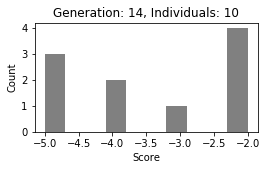

<Figure size 432x288 with 0 Axes>

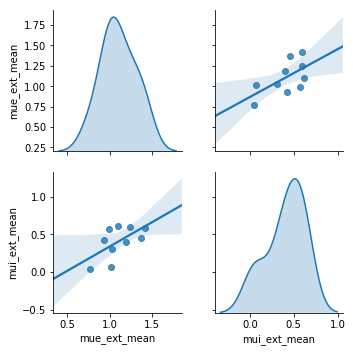

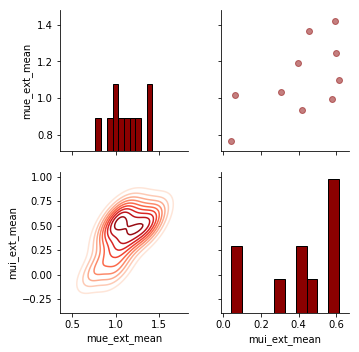

Printing 10 individuals
Individual 0 pars mue_ext_mean 1.369, mui_ext_mean 0.4555
	Fitness values:  2.0
Individual 1 pars mue_ext_mean 1.015, mui_ext_mean 0.06468
	Fitness values:  2.0
Individual 2 pars mue_ext_mean 1.189, mui_ext_mean 0.3957
	Fitness values:  2.0
Individual 3 pars mue_ext_mean 1.032, mui_ext_mean 0.3046
	Fitness values:  2.0
Individual 4 pars mue_ext_mean 0.7658, mui_ext_mean 0.0422
	Fitness values:  3.0
Individual 5 pars mue_ext_mean 1.246, mui_ext_mean 0.5982
	Fitness values:  4.0
Individual 6 pars mue_ext_mean 1.423, mui_ext_mean 0.5903
	Fitness values:  4.0
Individual 7 pars mue_ext_mean 0.9349, mui_ext_mean 0.4184
	Fitness values:  5.0
Individual 8 pars mue_ext_mean 0.9925, mui_ext_mean 0.5764
	Fitness values:  5.0
Individual 9 pars mue_ext_mean 1.098, mui_ext_mean 0.6141
	Fitness values:  5.0


In [8]:
evolution.info(plot=True)

In [9]:
# This will load results from disk in case the session is 
# started newly and the trajectory is not in memory
traj = evolution.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/evolution.hdf
MainProcess root INFO     Analyzing trajectory results-2020-01-31-18H-36M-12S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2020-01-31-18H-36M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `derived_parameters` in mode `1`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


In [10]:
gens, all_scores = evolution.getScoresDuringEvolution()

Text(0, 0.5, 'Score')

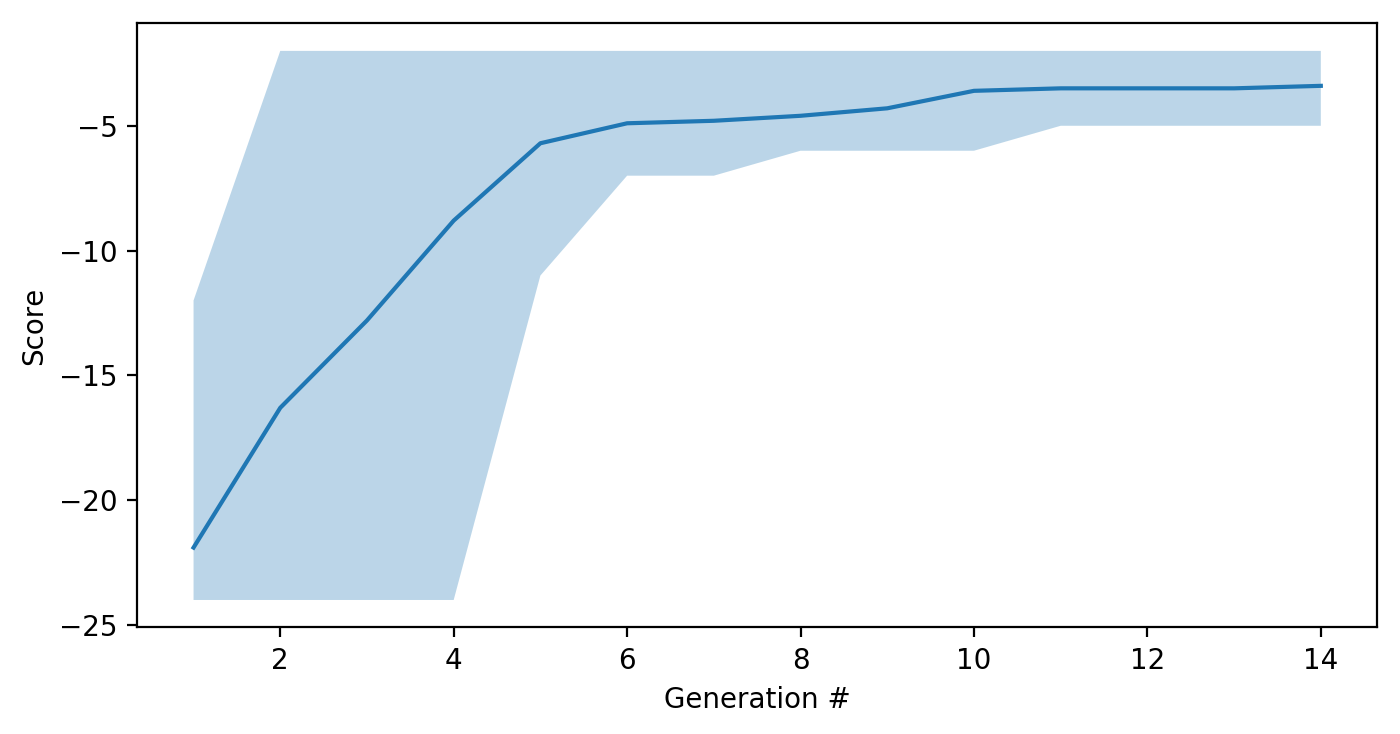

In [11]:
plt.figure(figsize=(8, 4), dpi=200)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")

In [36]:
import dill
# if we're lazy, we can just dump the whole evolution object into a file
dill.dump(evolution, open("/Users/caglar/tmp/evolution.dill", "wb"))